In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import timeit
import feather
import statsmodels as stm
import autotime
%matplotlib inline
%load_ext autotime
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
res = pd.read_csv('Route_XXXX_travel_time_csvs/Route_016C_travel_time.csv')
route_list_00510052 = ['0001', '0016', '0011', '0013', '0122', '041C', '0033', '040D', '041B', '040B', '041A', '0041', '0044', '0040', '016C']

for r in route_list_00510052:
    df = pd.read_csv('Route_XXXX_travel_time_csvs/Route_%s_travel_time.csv' % r)
    res = pd.concat([df, res], axis=0) 
res

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Tuesday,3669,23,016C0001,0.0,73473669,False,7347,2012-11-06,20,6175,15.5
1,Tuesday,7349,23,016C0001,0.0,36697349,False,3669,2012-11-06,39,6175,15.5
2,Tuesday,1631,23,016C0001,0.0,73491631,False,7349,2012-11-06,120,6175,15.5
3,Tuesday,1632,23,016C0001,0.0,16311632,False,1631,2012-11-06,23,6175,15.5
4,Tuesday,1633,23,016C0001,0.0,16321633,False,1632,2012-11-06,18,6175,15.5
5,Tuesday,1635,23,016C0001,0.0,16331635,False,1633,2012-11-06,43,6175,15.5
6,Tuesday,1636,23,016C0001,0.0,16351636,False,1635,2012-11-06,18,6175,15.5
7,Tuesday,1637,23,016C0001,0.0,16361637,False,1636,2012-11-06,41,6175,15.5
8,Tuesday,1638,23,016C0001,0.0,16371638,False,1637,2012-11-06,18,6175,15.5
9,Tuesday,1639,23,016C0001,0.0,16381639,False,1638,2012-11-06,61,6175,15.5


time: 8.75 s


Description:  Segment on Dorset St, coming into town, before turning down to Parnell Square.

In [3]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in res:
    print(column + "\t" + str(len(res[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1114
HourFrame	19
JourneyPatternID	81
Rain	125
SSID	8719
SchoolHoliday	2
SourceStopID	1113
TimeFrame	57
TravelTime	2313
VehicleJourneyID	7383
WindSpeed	58
time: 521 ms


In [4]:
# create dataframe for SSID 00510052

res['SSID'] = res['SSID'].astype('category')
dorset = res[res.SSID == 510052]
dorset.shape

(25437, 12)

time: 351 ms


This is a big one.

In [5]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in dorset:
    print(column + "\t" + str(len(dorset[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1
HourFrame	19
JourneyPatternID	38
Rain	125
SSID	1
SchoolHoliday	2
SourceStopID	1
TimeFrame	57
TravelTime	159
VehicleJourneyID	4012
WindSpeed	57
time: 13 ms


In [6]:
# drop unneeded columns

dorset = dorset.drop(['SourceStopID', 'DestStopID'], axis=1)

time: 3 ms


In [7]:
# reorder columns

dorset = dorset[['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'TimeFrame', 'JourneyPatternID', 'VehicleJourneyID', 'SSID']]

time: 7 ms


In [8]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 
dorset.SSID = dorset.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 37 ms


In [9]:
dorset.reset_index(inplace=True)
dorset = dorset.drop('index', axis=1)
dorset

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
0,40,23,Tuesday,False,0.000000,15.5,2012-11-06,016C0001,6175,00510052
1,20,23,Tuesday,False,0.000000,15.5,2012-11-06,016C0001,6184,00510052
2,22,23,Wednesday,False,0.033325,16.5,2012-11-07,016C0001,6175,00510052
3,21,23,Wednesday,False,0.033325,16.5,2012-11-07,016C0001,6184,00510052
4,18,23,Thursday,False,0.000000,13.0,2012-11-08,016C0001,6175,00510052
5,20,23,Thursday,False,0.000000,13.0,2012-11-08,016C0001,6184,00510052
6,39,23,Friday,False,0.000000,10.5,2012-11-09,016C0001,6175,00510052
7,38,23,Friday,False,0.000000,10.5,2012-11-09,016C0001,6184,00510052
8,42,23,Saturday,True,0.000000,9.5,2012-11-10,016C0001,12455,00510052
9,43,23,Monday,False,0.000000,10.5,2012-11-12,016C0001,6175,00510052


time: 36 ms


In [10]:
# save as csv

r = dorset.loc[0, 'SSID'] 
dorset.to_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 164 ms


In [11]:
# load csv

dorset = pd.read_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 32 ms


In [12]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 

dorset.SSID = dorset.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 22 ms


In [13]:
dorset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25437 entries, 0 to 25436
Data columns (total 11 columns):
Unnamed: 0          25437 non-null int64
TravelTime          25437 non-null int64
HourFrame           25437 non-null int64
Day                 25437 non-null object
SchoolHoliday       25437 non-null bool
Rain                25437 non-null float64
WindSpeed           25437 non-null float64
TimeFrame           25437 non-null object
JourneyPatternID    25437 non-null object
VehicleJourneyID    25437 non-null int64
SSID                25437 non-null object
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 7.5 MB
time: 20 ms


In [14]:
dorset = dorset.drop('Unnamed: 0', axis=1)

time: 3 ms


In [15]:
# assign more appropriate datatypes
dorset['Day'] = dorset['Day'].astype('category')
dorset['JourneyPatternID'] = dorset['JourneyPatternID'].astype('category')
dorset['VehicleJourneyID'] = dorset['VehicleJourneyID'].astype('category')
dorset['SSID'] = dorset['SSID'].astype('category')
dorset['HourFrame'] = dorset['HourFrame'].astype('category')
dorset['TimeFrame'] = pd.to_datetime(dorset['TimeFrame'], format='%Y-%m-%d')

time: 20 ms


In [16]:
# necessary for later operation

dorset.JourneyPatternID.cat.remove_unused_categories(inplace=True)

time: 2 ms


In [17]:
dorset.memory_usage(deep=True)

Index                   80
TravelTime          203496
HourFrame            26229
Day                  26206
SchoolHoliday        25437
Rain                203496
WindSpeed           203496
TimeFrame           203496
JourneyPatternID     27851
VehicleJourneyID    246810
SSID                 25582
dtype: int64

time: 6 ms


## Analysis of target feature TravelTime

Histiogram of values (x-axis is number of seconds)

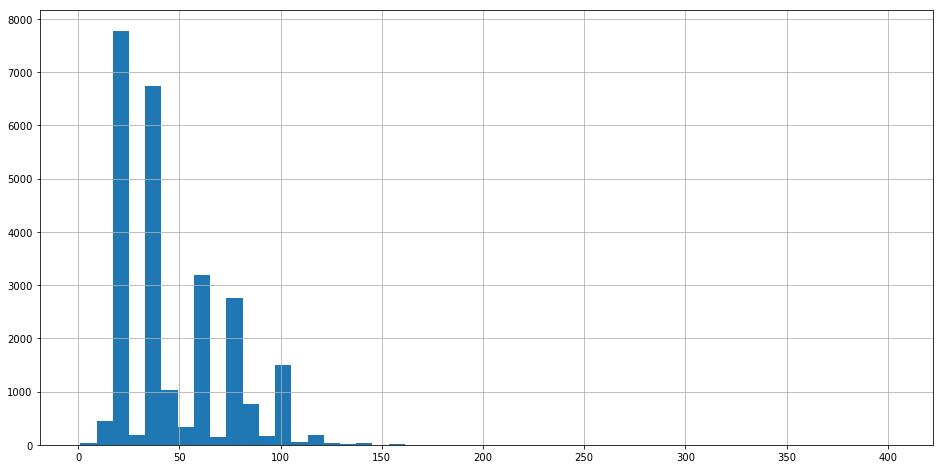

time: 233 ms


In [18]:
dorset.TravelTime.hist(figsize=(16, 8), bins=50)

Lots of variety there.

Boxplot to check for outliers

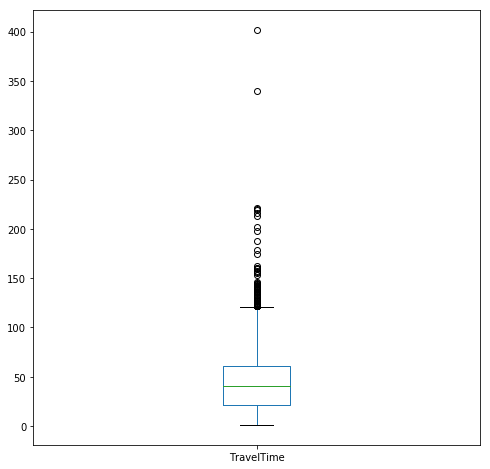

time: 262 ms


In [19]:
dorset.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

In [20]:
# checking how isolated top high-value outliers are in terms of time/date, and density of low-value outliers 

dorset.sort_values(['TravelTime', 'TimeFrame'], ascending=False, inplace=True)
dorset

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
25033,402,16,Thursday,False,0.000000,5.0,2013-01-24,10001,4633,00510052
2194,340,19,Saturday,True,0.000000,12.5,2013-01-05,400001,11725,00510052
14935,221,14,Saturday,True,0.000000,6.0,2013-01-19,1220001,8560,00510052
13602,220,9,Wednesday,False,0.000000,6.0,2012-11-21,1220001,1382,00510052
1497,219,14,Saturday,True,0.000000,3.0,2012-11-24,400001,11906,00510052
1739,216,12,Wednesday,False,0.000000,7.0,2012-11-28,400001,5741,00510052
24254,213,12,Wednesday,False,0.000000,7.0,2012-11-28,10001,4789,00510052
9713,202,14,Sunday,True,0.000000,6.0,2012-11-25,331001,13205,00510052
10366,198,12,Friday,True,0.000000,7.0,2013-01-04,331004,243,00510052
8702,188,12,Wednesday,False,0.000000,7.0,2012-11-28,040D1002,2344,00510052


time: 40 ms


Observation:  Lots of way too short ones.

## Weather features

(array([ 0.5,  1.5,  2.5]), <a list of 3 Text xticklabel objects>)

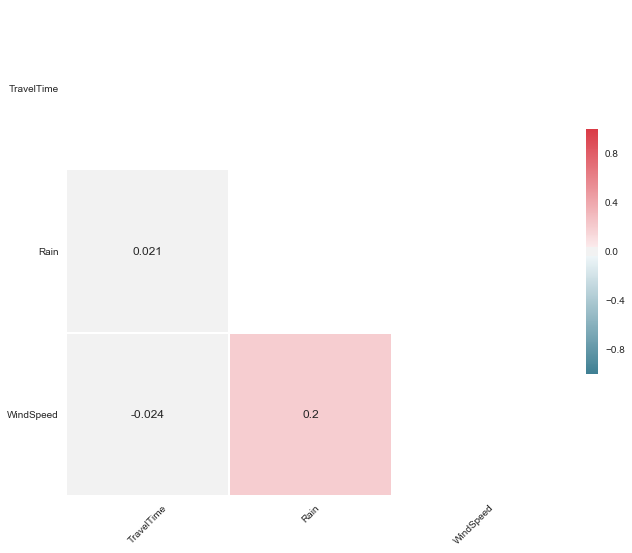

time: 192 ms


In [21]:
# checking correlations between weather and TravelTime

cont_columns = dorset[['TravelTime', 'Rain', 'WindSpeed']].columns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = df[cont_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

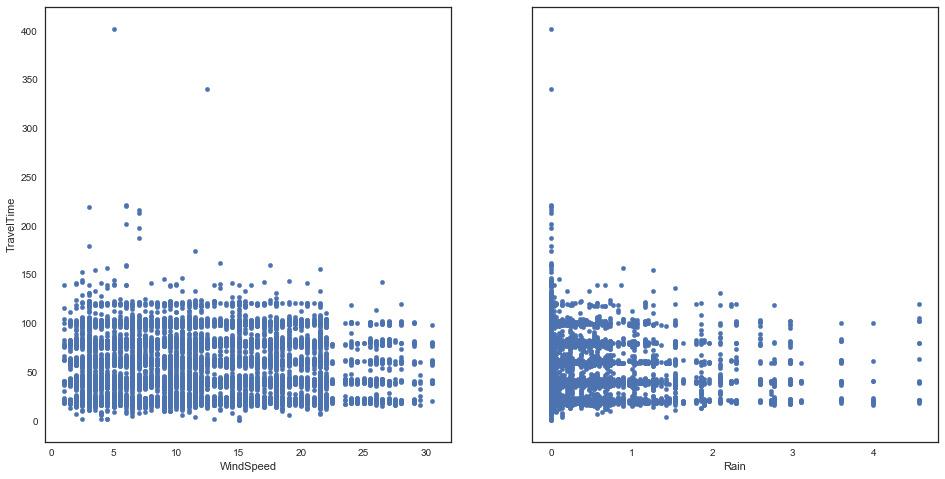

time: 810 ms


In [22]:
# scatterplots for the relationship between weather and TravelTime
fig, axs = plt.subplots(1, 2, sharey=True)
dorset.plot(kind='scatter', x='WindSpeed', y='TravelTime', ax=axs[0], figsize=(16, 8))
dorset.plot(kind='scatter', x='Rain', y='TravelTime', ax=axs[1])

Observation:  

## TravelTime and categorical features

In [23]:
# Checking stats for TravelTime so as to better understand the following graphs
# Create values for horizontal lines in the charts below to represent the mean/medium.

dorset_mean = dorset.TravelTime.mean()
dorset_median  = dorset.TravelTime.median()
dorset.TravelTime.describe()

count    25437.000000
mean        46.959115
std         26.650527
min          1.000000
25%         21.000000
50%         41.000000
75%         61.000000
max        402.000000
Name: TravelTime, dtype: float64

time: 8 ms


## JourneyPatternID strip plot

#### Note: In below charts, horizontal line is overall mean/median

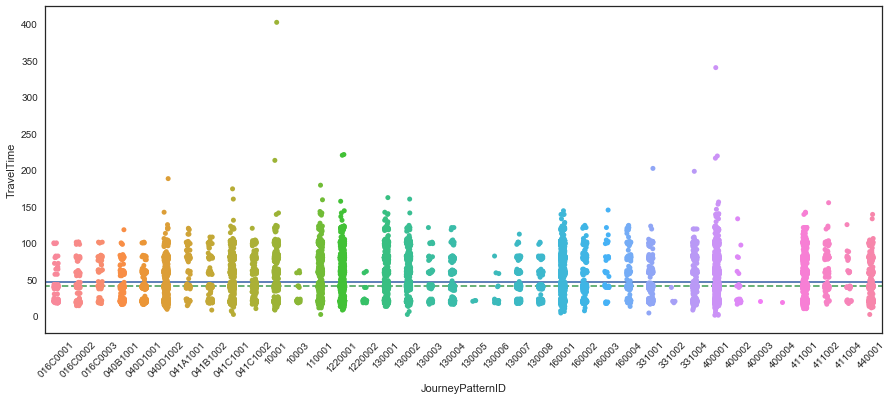

time: 910 ms


In [49]:
dorset.JourneyPatternID.cat.remove_unused_categories(inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=45)
sns.stripplot(x='JourneyPatternID', y="TravelTime", data=dorset, jitter=True);

coord_x1 = -1
coord_y1 = dorset_mean
coord_z1 = dorset_median
coord_x2 = 50


# mean full line, median dashed line
plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')
plt.plot([coord_x1, coord_x2], [coord_z1, coord_z1], '--')

Observation: Lots of outliers in the front too.  

### Bar plot for mean TravelTime per JourneyPatternID

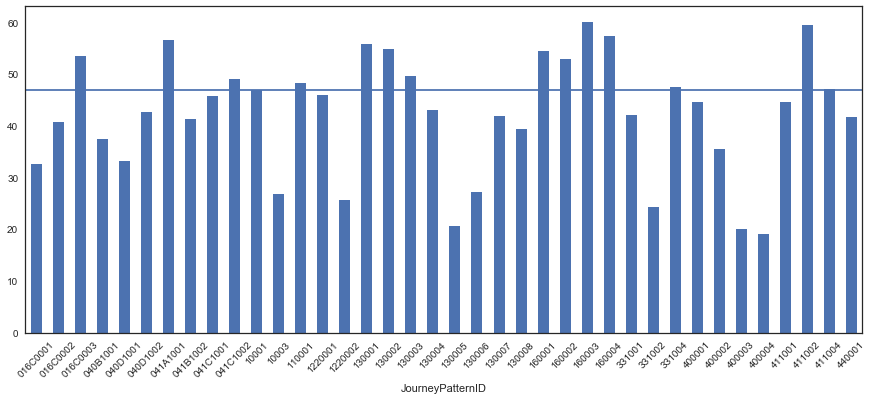

time: 276 ms


In [48]:
mean_JPID = dorset.groupby('JourneyPatternID')['TravelTime'].mean()
mean_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

# code for line from https://stackoverflow.com/questions/38017465/how-to-add-a-line-on-top-of-a-bar-chart

coord_x1 = -1
coord_y1 = dorset_mean
coord_x2 = 50

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per JourneyPatternID

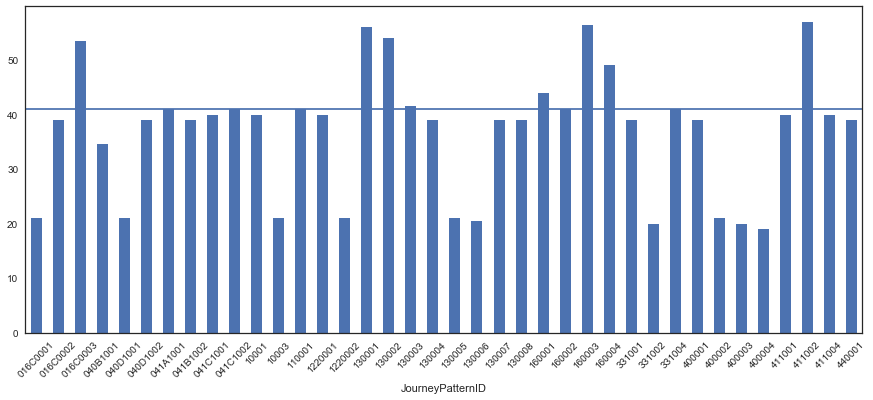

time: 271 ms


In [47]:
median_JPID = dorset.groupby('JourneyPatternID')['TravelTime'].median()
median_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

coord_x1 = -1
coord_y1 = dorset_median
coord_x2 = 50

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Several well outside the mean/median here too.  No obvious rhyme or reason.  Hopeful that route frequency or length might capture some.

### Bar plot for mean TravelTime per HourFrame

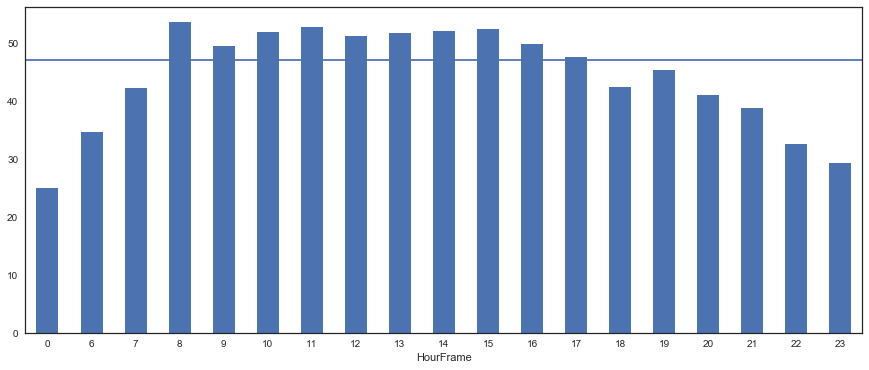

time: 182 ms


In [27]:
mean_HF = dorset.groupby('HourFrame')['TravelTime'].mean()
mean_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = dorset_mean
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

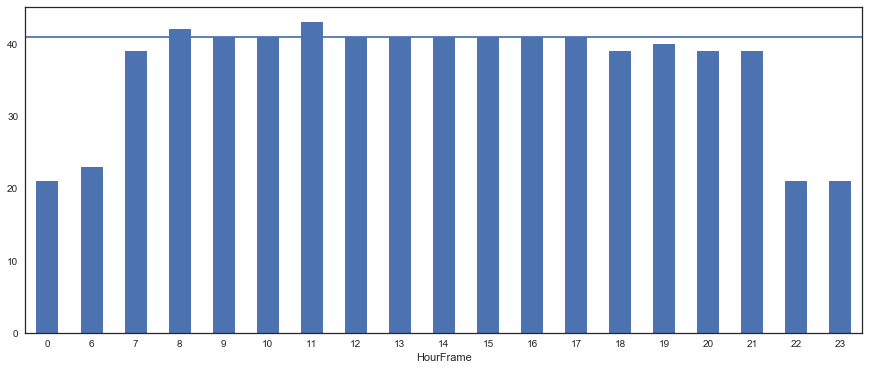

time: 220 ms


In [28]:
med_HF = dorset.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = dorset_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Quite very early and late, go go the rest of the day.

### Bar plot for mean TravelTime per Day

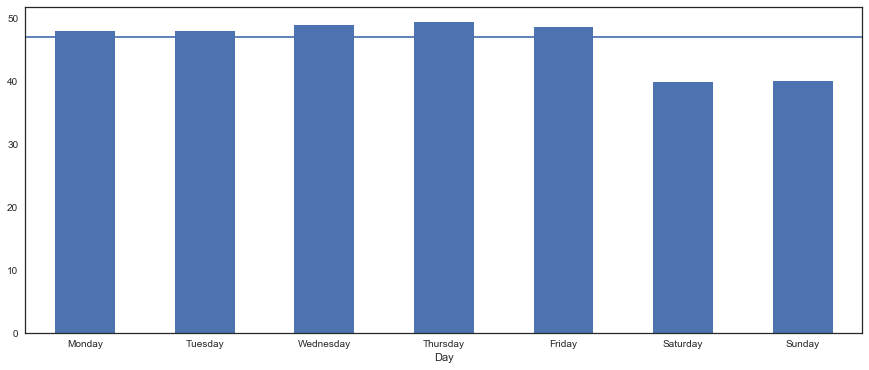

time: 142 ms


In [29]:
mean_Day = dorset.groupby('Day')['TravelTime'].mean()
mean_Day=mean_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = dorset_mean

coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

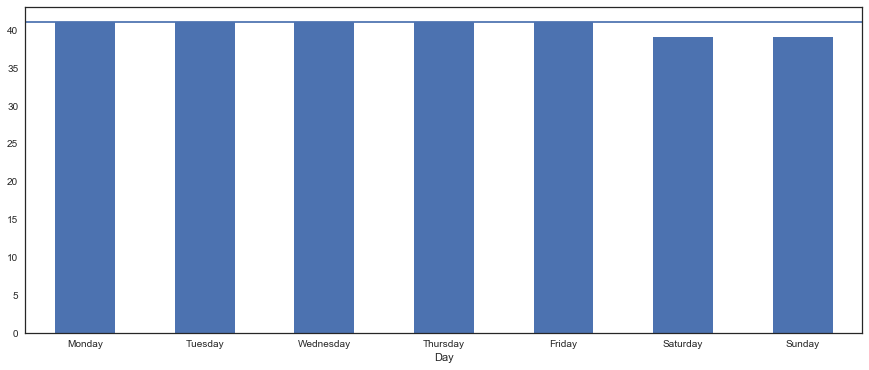

time: 151 ms


In [50]:
med_Day = dorset.groupby('Day')['TravelTime'].median()

med_Day=med_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
med_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = dorset_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Slightly quieter on weekends.

### Bar plot for mean TravelTime when SchoolHoliday true/false

In [31]:
# check how many rows are true/false for SchoolHoliday
dorset.SchoolHoliday.describe().T

count     25437
unique        2
top       False
freq      19126
Name: SchoolHoliday, dtype: object

time: 6 ms


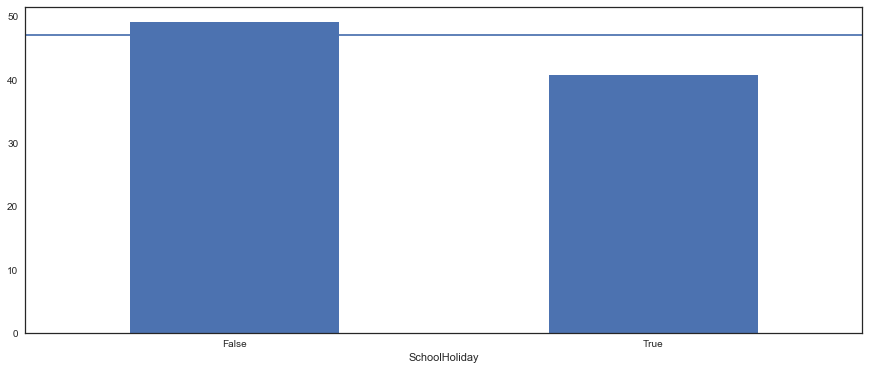

time: 127 ms


In [32]:
mean_SH = dorset.groupby('SchoolHoliday')['TravelTime'].mean()
mean_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = dorset_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime when SchoolHoliday true/false

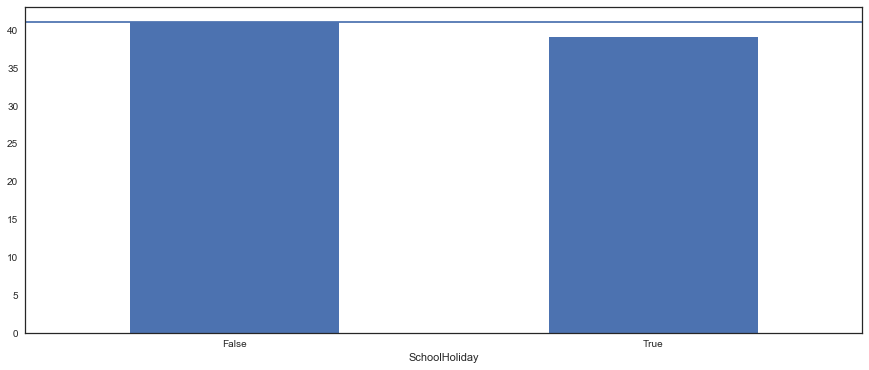

time: 129 ms


In [33]:
med_SH = dorset.groupby('SchoolHoliday')['TravelTime'].median()
med_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = dorset_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

## Looking at dropping outliers

In [35]:
# make a copy of original df
trimdorset = dorset.copy()

# Remove TravelTime outliers beyond a conservative 3 x IQR
# Code adapted from here: http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/07%20-%20Lesson.ipynb
# Also got some help here: https://www.reddit.com/r/learnpython/comments/65sz8g/trying_to_get_highlight_outliers_in_a_dataframe/
# Functions first defined for calculating upper and lower bounds.
lowerOp = trimdorset.quantile(q=.25) - (3*(trimdorset.quantile(q=.75)-trimdorset.quantile(q=.25)))
upperOp = trimdorset.quantile(q=.75) + (3*(trimdorset.quantile(q=.75)-trimdorset.quantile(q=.25)))

# New boolean column created where values beyond the bounds for 'TravelTime' are tagged as True.
trimdorset['OutlierTT'] = (trimdorset['TravelTime'] < lowerOp['TravelTime']) | (trimdorset['TravelTime'] > upperOp['TravelTime'])

# Outlier rows counted
print("There would be", trimdorset[(trimdorset['OutlierTT'] == True)].shape[0], "outliers dropped.")

There would be 10 outliers dropped.
time: 27 ms


In [36]:
trimdorset = trimdorset[trimdorset.OutlierTT != True]
trimdorset.sort_values(['TravelTime'], ascending=False, inplace=True)

time: 56 ms


In [37]:
trimdorset

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID,XBuses,OutlierTT
19160,179,18,Friday,False,0.000000,3.0,2012-11-30,110001,4625,00510052,0,False
11149,174,13,Wednesday,False,0.000000,11.5,2012-11-21,041C1001,66,00510052,0,False
15885,162,12,Friday,False,0.000000,13.5,2012-11-23,130001,3452,00510052,0,False
11284,160,14,Sunday,True,0.000000,6.0,2012-11-25,041C1001,13127,00510052,0,False
16902,160,12,Tuesday,False,0.000000,17.5,2012-11-20,130002,3413,00510052,0,False
18664,159,18,Wednesday,False,0.000000,6.0,2012-11-14,110001,5309,00510052,0,False
13778,157,19,Saturday,True,0.899902,4.5,2012-11-24,1220001,8614,00510052,0,False
3897,156,10,Thursday,False,0.000000,21.5,2013-01-31,400001,5525,00510052,0,False
7073,155,8,Monday,False,1.266667,3.5,2013-01-21,411002,24,00510052,0,False
1888,153,19,Friday,False,0.000000,2.5,2012-11-30,400001,5753,00510052,0,False


time: 44 ms


NOTE - Outliers not removed.

Observation:  

### Linear Regression model

In [61]:
# Train/fit a model using all features to start with.
# Some modifications to the data first

# dropping SSID and TimeFrame as these have no predictive value here
LRdorset = dorset.drop(['SSID', 'TimeFrame'], axis=1)

# Convert binary categorical SchoolHoliday column to numerical.
LRdorset['SchoolHoliday'] = LRdorset['SchoolHoliday'].astype('int')

time: 4 ms


In [62]:
# preliminary training to see which variables are worth selecting
lrle = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + C(JourneyPatternID)+ C(HourFrame) + C(Day)", data=LRdorset).fit()

time: 213 ms


In [63]:
print(lrle.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     45.89
Date:                Mon, 31 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:46:30   Log-Likelihood:            -1.1820e+05
No. Observations:               25437   AIC:                         2.365e+05
Df Residuals:                   25372   BIC:                         2.371e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Observation:  Very very low.

In [64]:
rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle) 

print ("Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.")
print ("The R-squared value of", rsqa, "means that Linear Regression is unlikely to be useful in the long run though.")
#ols(y=rets['AAPL'], x=rets.ix[:, ['GOOG']]).rsquared

Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.
The R-squared value of 0.101479887574 means that Linear Regression is unlikely to be useful in the long run though.
time: 2 ms


In [65]:
# Train/fit a model using features with p-value under 0.05

# create dummy variables from HourFrame, Day, JourneyPatternID using get_dummies
# code adapted from: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
HF_dummies = pd.get_dummies(LRdorset.HourFrame, prefix='HF')
Day_dummies = pd.get_dummies(LRdorset.Day, prefix='Day')
JPID_dummies = pd.get_dummies(LRdorset.JourneyPatternID, prefix='JPID')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
LRdorset = pd.concat([LRdorset, HF_dummies, Day_dummies, JPID_dummies], axis=1)

time: 10 ms


In [66]:
print(LRdorset.columns.values.tolist())

['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'JourneyPatternID', 'VehicleJourneyID', 'XBuses', 'HF_0', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'JPID_016C0001', 'JPID_016C0002', 'JPID_016C0003', 'JPID_040B1001', 'JPID_040D1001', 'JPID_040D1002', 'JPID_041A1001', 'JPID_041B1002', 'JPID_041C1001', 'JPID_041C1002', 'JPID_10001', 'JPID_10003', 'JPID_110001', 'JPID_1220001', 'JPID_1220002', 'JPID_130001', 'JPID_130002', 'JPID_130003', 'JPID_130004', 'JPID_130005', 'JPID_130006', 'JPID_130007', 'JPID_130008', 'JPID_160001', 'JPID_160002', 'JPID_160003', 'JPID_160004', 'JPID_331001', 'JPID_331002', 'JPID_331004', 'JPID_400001', 'JPID_400002', 'JPID_400003', 'JPID_400004', 'JPID_411001', 'JPID_411002', 'JPID_411004', 'JPID_440001']
time: 1e+03 µs


In [67]:
LRdorset.head(25)

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,JourneyPatternID,VehicleJourneyID,XBuses,HF_0,...,JPID_331002,JPID_331004,JPID_400001,JPID_400002,JPID_400003,JPID_400004,JPID_411001,JPID_411002,JPID_411004,JPID_440001
25033,402,16,Thursday,0,0.000000,5.0,10001,4633,0,0,...,0,0,0,0,0,0,0,0,0,0
2194,340,19,Saturday,1,0.000000,12.5,400001,11725,0,0,...,0,0,1,0,0,0,0,0,0,0
14935,221,14,Saturday,1,0.000000,6.0,1220001,8560,0,0,...,0,0,0,0,0,0,0,0,0,0
13602,220,9,Wednesday,0,0.000000,6.0,1220001,1382,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,219,14,Saturday,1,0.000000,3.0,400001,11906,0,0,...,0,0,1,0,0,0,0,0,0,0
1739,216,12,Wednesday,0,0.000000,7.0,400001,5741,0,0,...,0,0,1,0,0,0,0,0,0,0
24254,213,12,Wednesday,0,0.000000,7.0,10001,4789,0,0,...,0,0,0,0,0,0,0,0,0,0
9713,202,14,Sunday,1,0.000000,6.0,331001,13205,0,0,...,0,0,0,0,0,0,0,0,0,0
10366,198,12,Friday,1,0.000000,7.0,331004,243,0,0,...,0,1,0,0,0,0,0,0,0,0
8702,188,12,Wednesday,0,0.000000,7.0,040D1002,2344,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 32 ms


In [68]:
lrle1 = sm.ols(formula="TravelTime ~  JPID_040B1001 + JPID_040D1002 + JPID_041A1001 + JPID_130001 + JPID_130002 + JPID_160001 + JPID_160002 + JPID_160003 + JPID_160004 + JPID_411002 + SchoolHoliday + WindSpeed + Rain + HF_0 + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23 + Day_Friday + Day_Monday + Day_Saturday + Day_Sunday + Day_Thursday + Day_Tuesday + Day_Wednesday", data=LRdorset).fit()

time: 110 ms


In [69]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     76.81
Date:                Mon, 31 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:46:30   Log-Likelihood:            -1.1825e+05
No. Observations:               25437   AIC:                         2.366e+05
Df Residuals:                   25399   BIC:                         2.369e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.7312      0.372     98.770

Observation:  Rain is not useful here, for once.  Some hours seem to randomly drop in p-value.  Only 10 outliers; not worth dropping.